In [ ]:
!pip install ydata-profiling
!pip install pyodbc
import numpy as np
import os
import pandas as pd
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
import pyodbc
import seaborn as sns
sns.set()
plt.style.use('seaborn-v0_8')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
import missingno as msno
import warnings
import datetime
warnings.filterwarnings("ignore")
import nltk
#nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.2/346.2 kB 4.6 MB/s eta 0:00:00


<ipython-input-4-8e2cf1aac30e>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load pkl file
output_pkl = '/content/drive/My Drive/Colab Notebooks/ML Project/NBA_cleaned.pkl'
df = pd.read_pickle(output_pkl)

# Display the first few rows of the data
print(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            Player   GP     MIN  FGM  FGA  3PM  3PA  FTM  FTA  TOV  ...  \
0  . Rufukatijiang   20   249.0   56   96    0    0   19   27   21  ...   
1  A'uston Calhoun   50  1360.0  246  558   46  141   96  128   94  ...   
2       A.C. Green  187  3769.0  354  801    1   10  161  229  107  ...   
3    A.D. Vassallo   68  1952.5  394  870  175  434  209  249  150  ...   
4    A.J. Bramlett   98  2842.7  468  884    0    6  176  366  182  ...   

   Playoffs_Indication  final_birth_year  final_height_cm  final_weight_kg  \
0                    0            1998.0              NaN              NaN   
1                    0            1990.0            201.0            106.0   
2                    1            1963.0            206.0            100.0   
3                    0            1986.0            198.0             98.0   
4                    0        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load csv file
output_csv = '/content/drive/My Drive/Colab Notebooks/ML Project/NBA_cleaned.csv'
df = pd.read_csv(output_csv)

# Display the first few rows of the data
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            Player   GP     MIN  FGM  FGA  3PM  3PA  FTM  FTA  TOV  ...  \
0  . Rufukatijiang   20   249.0   56   96    0    0   19   27   21  ...   
1  A'uston Calhoun   50  1360.0  246  558   46  141   96  128   94  ...   
2       A.C. Green  187  3769.0  354  801    1   10  161  229  107  ...   
3    A.D. Vassallo   68  1952.5  394  870  175  434  209  249  150  ...   
4    A.J. Bramlett   98  2842.7  468  884    0    6  176  366  182  ...   

   Playoffs_Indication  final_birth_year  final_height_cm  final_weight_kg  \
0                    0            1998.0              NaN              NaN   
1                    0            1990.0            201.0            106.0   
2                    1            1963.0            206.0            100.0   
3                    0            1986.0            198.0             98.0   
4                    0        

In [ ]:
df.head()

,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,...,Playoffs_Indication,final_birth_year,final_height_cm,final_weight_kg,height_source_fixed,height_source_original,birth_year_source_original,birth_year_source_unknown,weight_source_fixed,weight_source_original
0,. Rufukatijiang,20,249.0,56,96,0,0,19,27,21,...,0,1998.0,NaN,NaN,1,0,1,0,1,0
1,A'uston Calhoun,50,1360.0,246,558,46,141,96,128,94,...,0,1990.0,201.0,106.0,0,1,1,0,0,1
2,A.C. Green,187,3769.0,354,801,1,10,161,229,107,...,1,1963.0,206.0,100.0,0,1,1,0,0,1
3,A.D. Vassallo,68,1952.5,394,870,175,434,209,249,150,...,0,1986.0,198.0,98.0,0,1,1,0,0,1
4,A.J. Bramlett,98,2842.7,468,884,0,6,176,366,182,...,0,1977.0,208.0,103.0,0,1,1,0,0,1


In [ ]:
import pandas as pd

# Load pickle file
output_pkl = '/content/drive/My Drive/Colab Notebooks/ML Project/NBA_cleaned.pkl'
df = pd.read_pickle(output_pkl)

# Separate columns by data type
numeric_cols = df.select_dtypes(include=['number']).columns
string_cols = df.select_dtypes(include=['object']).columns

# Maximum values for numeric columns
df[numeric_cols].max().to_excel("/content/drive/My Drive/Colab Notebooks/ML Project/NBA_max_numeric.xlsx",
                                sheet_name='max_numeric')

# Maximum values for string columns (if needed)
# df[string_cols].max().to_excel("/content/drive/My Drive/Colab Notebooks/ML Project/NBA_max_string.xlsx",
#                                sheet_name='max_string')

# Minimum values for numeric columns
df[numeric_cols].min().to_excel("/content/drive/My Drive/Colab Notebooks/ML Project/NBA_min_numeric.xlsx",
                                sheet_name='min_numeric')

# Missing values
df.isnull().sum(axis=0).to_excel("/content/drive/My Drive/Colab Notebooks/ML Project/NBA_NA.xlsx",
                                 sheet_name='NA')

# Exporting results to the protocol
df.nunique().to_excel("/content/drive/My Drive/Colab Notebooks/ML Project/NBA_unique.xlsx",
                      sheet_name='unique')

print("Results have been exported successfully!")


Results have been exported successfully!


In [ ]:
#get dummies
df_dummy = df[[col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]]
df_dummy.shape

(14582, 10)

In [ ]:
#get all numeric data
cols = df.columns
df_num = df._get_numeric_data().columns.dropna().unique()
df_num.shape

(30,)

In [ ]:
# Create DataFrame with numeric columns that are not binary
df_num_non_dummy = df[list(set(df_num) - set(df_dummy.columns))]

# Display the shape of the new DataFrame
print(df_num_non_dummy.shape)

# Print the non-dummy numeric columns
print("Non-dummy numeric columns:", df_num_non_dummy.columns)


(14582, 20)
Non-dummy numeric columns: Index(['DRB', 'MIN', '3PM', 'FTM', 'GP', 'TOV', 'AST', 'BLK',
       'final_birth_year', 'REB', 'STL', 'ORB', 'final_weight_kg',
       'final_height_cm', 'FGM', 'PTS', 'FTA', 'FGA', 'PF', '3PA'],
      dtype='object')


In [ ]:
# Get all columns
cols = df.columns

# Create DataFrame with categorical columns
df_categorial = df[list(set(cols) - set(df_num))]

# Display the shape of the new DataFrame
print(df_categorial.shape)

# Print the categorical columns
print("Categorical columns:", df_categorial.columns)


(14582, 1)
Categorical columns: Index(['Player'], dtype='object')


Descriptive Statistics


Initial reports performed by Sweetwiz providing us with instant overview of data behavior



Sweetwiz

Autoviz report

In [ ]:
#from autoviz.AutoViz_Class import AutoViz_Class
#%matplotlib inline
#AV = AutoViz_Class()
#AV.AutoViz('amsterdam_final_data.csv')

Descriptive Statistics


In [ ]:
#Check how many columns
print(df.shape)
print(df.columns)

(14582, 31)
Index(['Player', 'GP', 'MIN', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV',
       'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'PTS', 'NBA_Indication',
       'Regular_Season_Indication', 'International_Indication',
       'Playoffs_Indication', 'final_birth_year', 'final_height_cm',
       'final_weight_kg', 'height_source_fixed', 'height_source_original',
       'birth_year_source_original', 'birth_year_source_unknown',
       'weight_source_fixed', 'weight_source_original'],
      dtype='object')


In [ ]:
df.iloc[:,:35].describe()


,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,...,Playoffs_Indication,final_birth_year,final_height_cm,final_weight_kg,height_source_fixed,height_source_original,birth_year_source_original,birth_year_source_unknown,weight_source_fixed,weight_source_original
count,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,...,14582.000000,14212.000000,14514.000000,12130.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000
mean,112.151077,2783.769154,418.807845,906.777328,105.324990,298.707653,208.283020,281.224112,174.849541,259.352695,...,0.057537,1988.363355,196.778903,94.351031,0.006446,0.993554,0.993211,0.006789,0.170621,0.829379
std,141.714248,3977.072247,681.458255,1459.030220,183.006652,490.800843,385.300692,498.506831,256.676651,337.463223,...,0.232873,7.238732,8.777110,11.749429,0.080032,0.080032,0.082119,0.082119,0.376191,0.376191
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1961.000000,160.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,592.650000,77.000000,175.000000,9.000000,33.000000,31.000000,46.000000,37.000000,60.000000,...,0.000000,1984.000000,191.000000,86.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,61.000000,1423.000000,204.000000,448.000000,39.000000,123.000000,91.000000,128.000000,90.500000,138.000000,...,0.000000,1989.000000,198.000000,93.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,144.000000,3462.000000,505.000000,1094.000000,123.000000,356.000000,241.000000,332.000000,218.000000,333.000000,...,0.000000,1994.000000,203.000000,102.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1525.000000,59365.000000,15152.000000,30168.000000,2898.000000,7354.000000,9139.000000,12423.000000,5374.000000,3890.000000,...,1.000000,2004.000000,229.000000,170.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,...,Playoffs_Indication,final_birth_year,final_height_cm,final_weight_kg,height_source_fixed,height_source_original,birth_year_source_original,birth_year_source_unknown,weight_source_fixed,weight_source_original
count,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,...,14582.000000,14212.000000,14514.000000,12130.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000
mean,112.151077,2783.769154,418.807845,906.777328,105.324990,298.707653,208.283020,281.224112,174.849541,259.352695,...,0.057537,1988.363355,196.778903,94.351031,0.006446,0.993554,0.993211,0.006789,0.170621,0.829379
std,141.714248,3977.072247,681.458255,1459.030220,183.006652,490.800843,385.300692,498.506831,256.676651,337.463223,...,0.232873,7.238732,8.777110,11.749429,0.080032,0.080032,0.082119,0.082119,0.376191,0.376191
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1961.000000,160.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,592.650000,77.000000,175.000000,9.000000,33.000000,31.000000,46.000000,37.000000,60.000000,...,0.000000,1984.000000,191.000000,86.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,61.000000,1423.000000,204.000000,448.000000,39.000000,123.000000,91.000000,128.000000,90.500000,138.000000,...,0.000000,1989.000000,198.000000,93.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,144.000000,3462.000000,505.000000,1094.000000,123.000000,356.000000,241.000000,332.000000,218.000000,333.000000,...,0.000000,1994.000000,203.000000,102.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1525.000000,59365.000000,15152.000000,30168.000000,2898.000000,7354.000000,9139.000000,12423.000000,5374.000000,3890.000000,...,1.000000,2004.000000,229.000000,170.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Check how many dummy columns
print(df_dummy.shape)
print(df_dummy.columns)

(14582, 10)
Index(['NBA_Indication', 'Regular_Season_Indication',
       'International_Indication', 'Playoffs_Indication',
       'height_source_fixed', 'height_source_original',
       'birth_year_source_original', 'birth_year_source_unknown',
       'weight_source_fixed', 'weight_source_original'],
      dtype='object')


In [ ]:
df_dummy.iloc[:,:12].describe()

,NBA_Indication,Regular_Season_Indication,International_Indication,Playoffs_Indication,height_source_fixed,height_source_original,birth_year_source_original,birth_year_source_unknown,weight_source_fixed,weight_source_original
count,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000
mean,0.076738,0.073652,0.943081,0.057537,0.006446,0.993554,0.993211,0.006789,0.170621,0.829379
std,0.266185,0.261213,0.231697,0.232873,0.080032,0.080032,0.082119,0.082119,0.376191,0.376191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


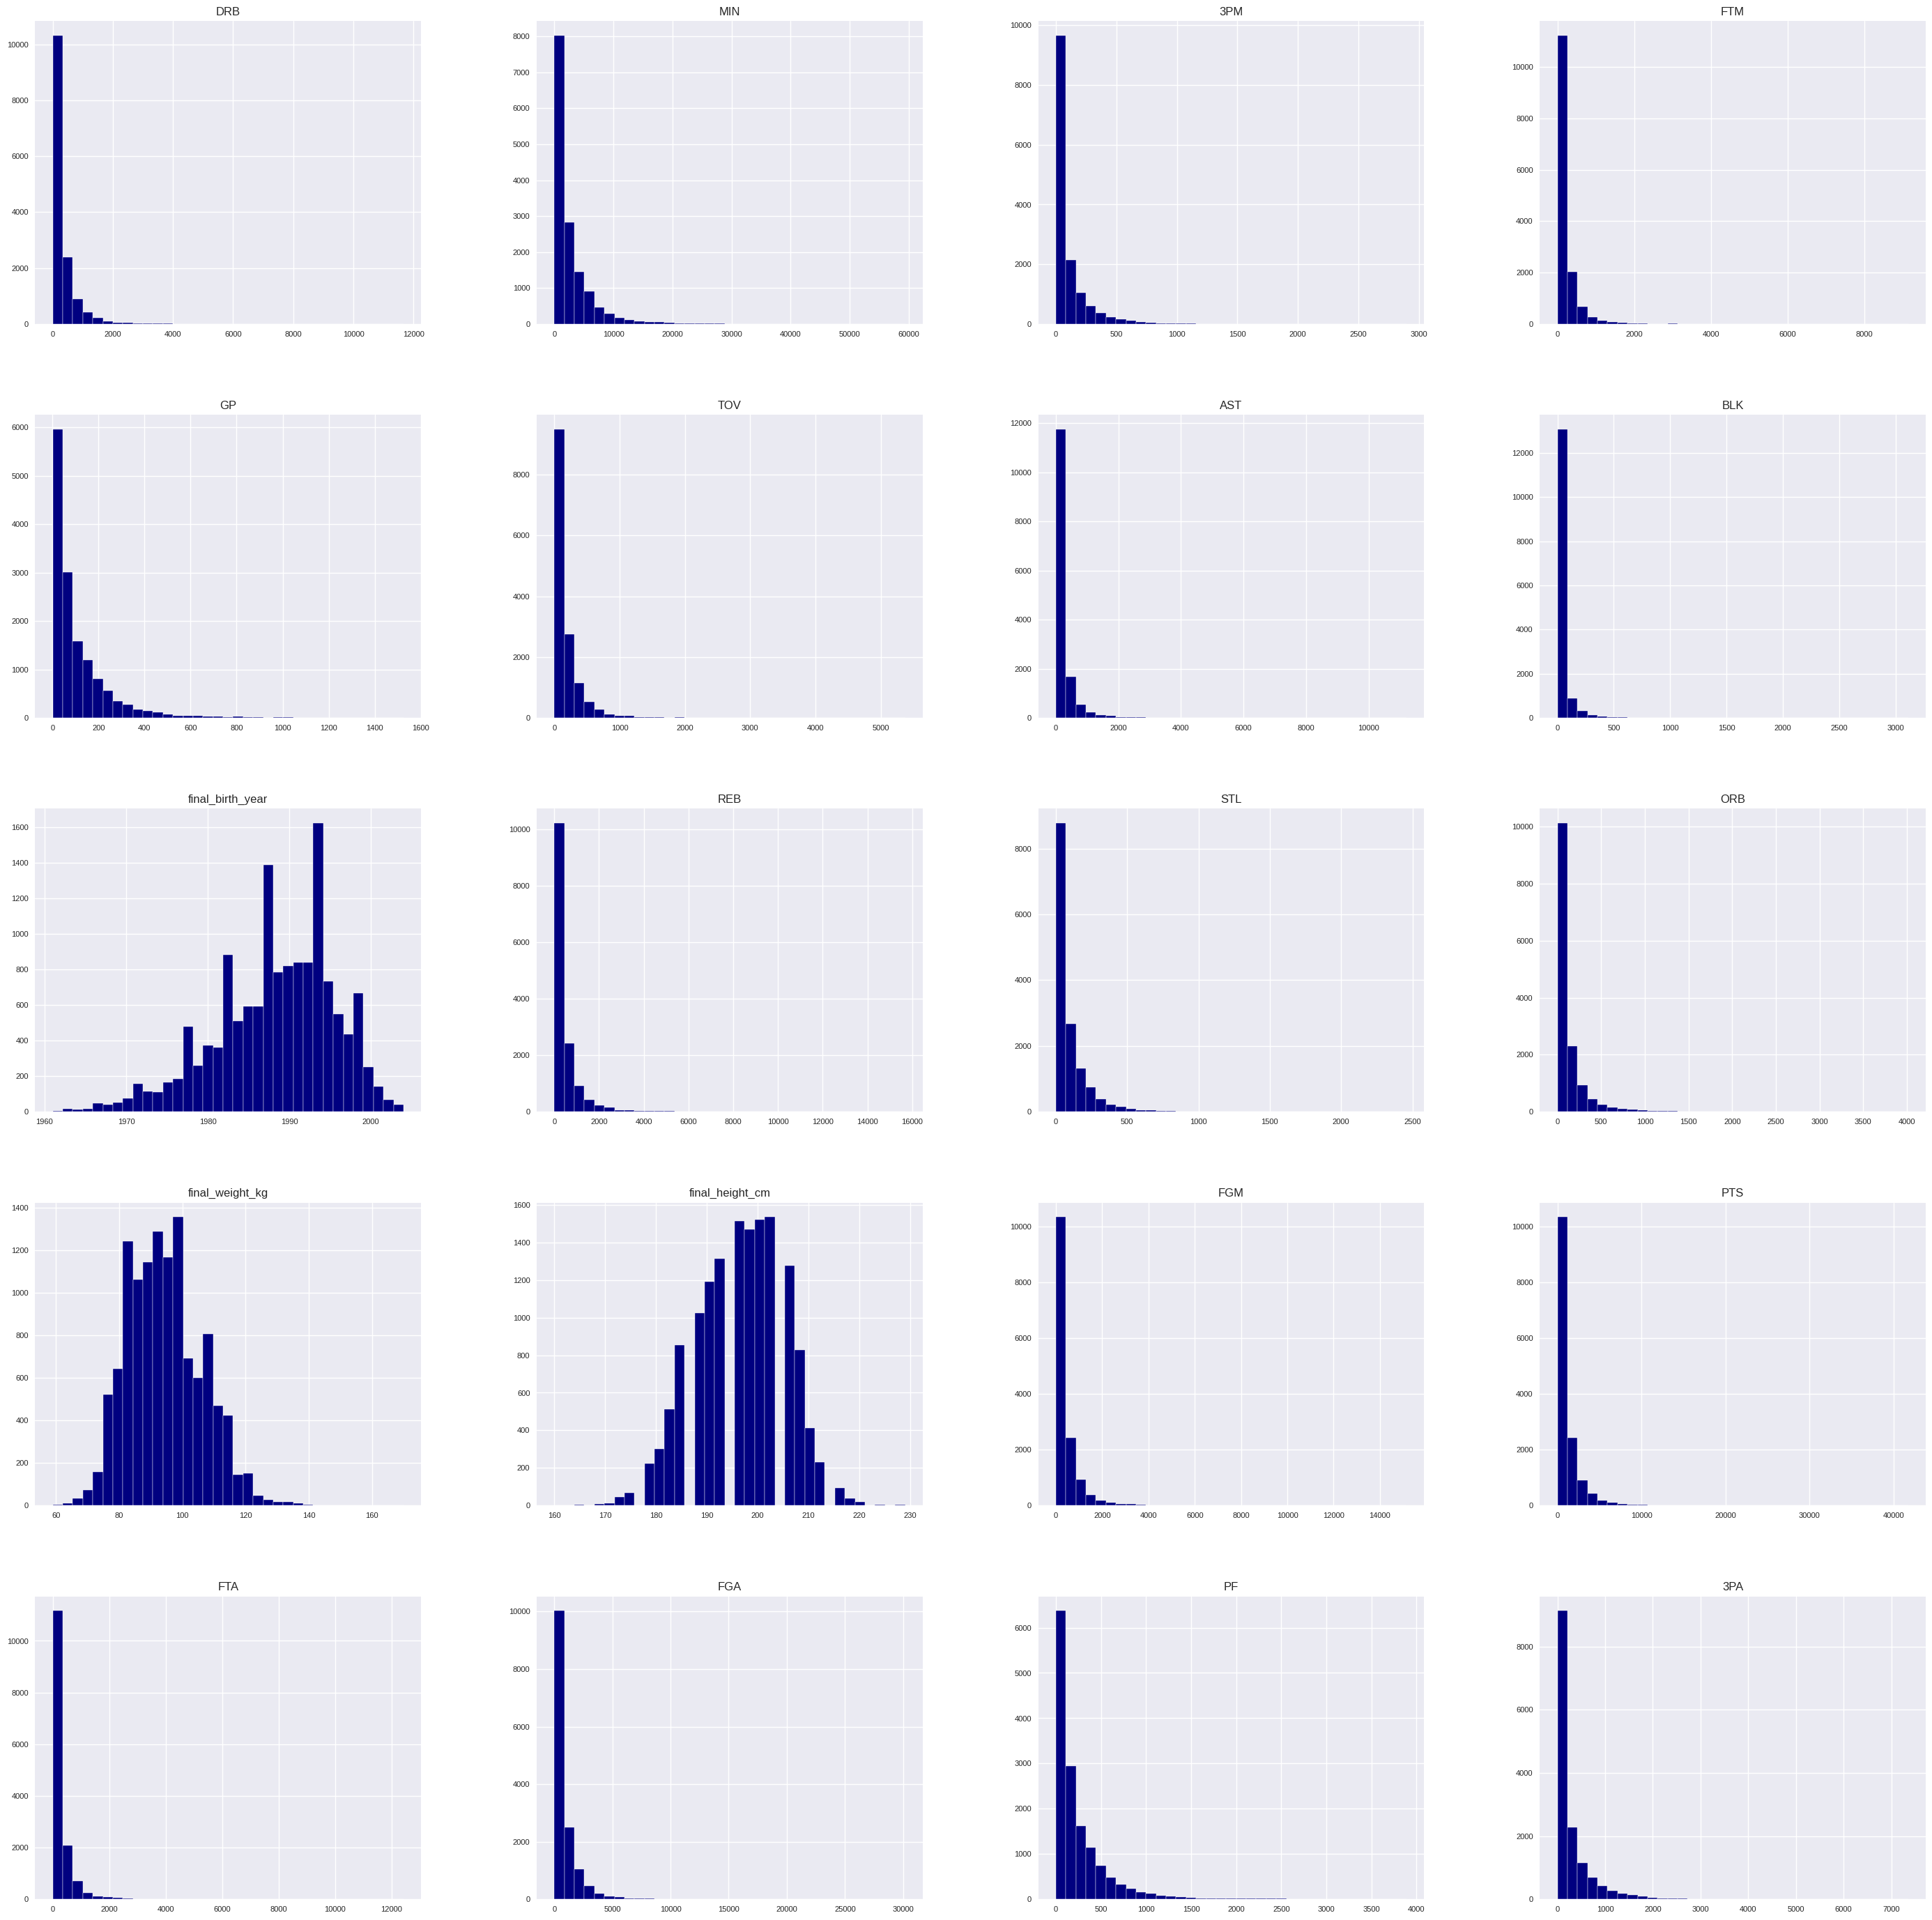

In [ ]:
df_num_non_dummy.hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "navy");

We can see that data is skewed, let's measure the asymmetry of the distribution:



In [ ]:
def highlight(cell_value):
    # Set background color based on skewness value
    if cell_value > 1:
        return 'background-color: mediumspringgreen;'
    elif cell_value < -1:
        return 'background-color: hotpink;'
    else:
        return ''

# Create a DataFrame with skewness values for numeric columns (non-dummy)
skew_df = pd.DataFrame(df_num_non_dummy.skew(), columns=['skewness'])
# Sort the DataFrame by skewness (descending)
skew_df = skew_df.sort_values(by='skewness', ascending=False)
# Apply cell highlighting
styled_skew_df = skew_df.style.applymap(highlight)

# Display the styled DataFrame
styled_skew_df


,skewness
BLK,9.407191
AST,7.900111
FTM,7.674437
FTA,7.404094
DRB,6.044819
PTS,6.035437
FGM,5.988539
FGA,5.930656
REB,5.748763
ORB,5.485407


Skewness Analysis
In our dataset, 17 data columns are positively skewed (skewness > 1), indicating a right-tailed distribution. These include BLK, AST, FTM, FTA, DRB, PTS, FGM, FGA, REB, ORB, TOV, 3PM, STL, 3PA, MIN, PF, and GP.
Meanwhile, 3 columns (final_weight_kg, final_height_cm, final_birth_year) exhibit nearly symmetric distributions (|skewness| < 1).

Later, we'll investigate whether outliers or missing values influence these distributions and determine if any transformations are necessary to normalize the data.




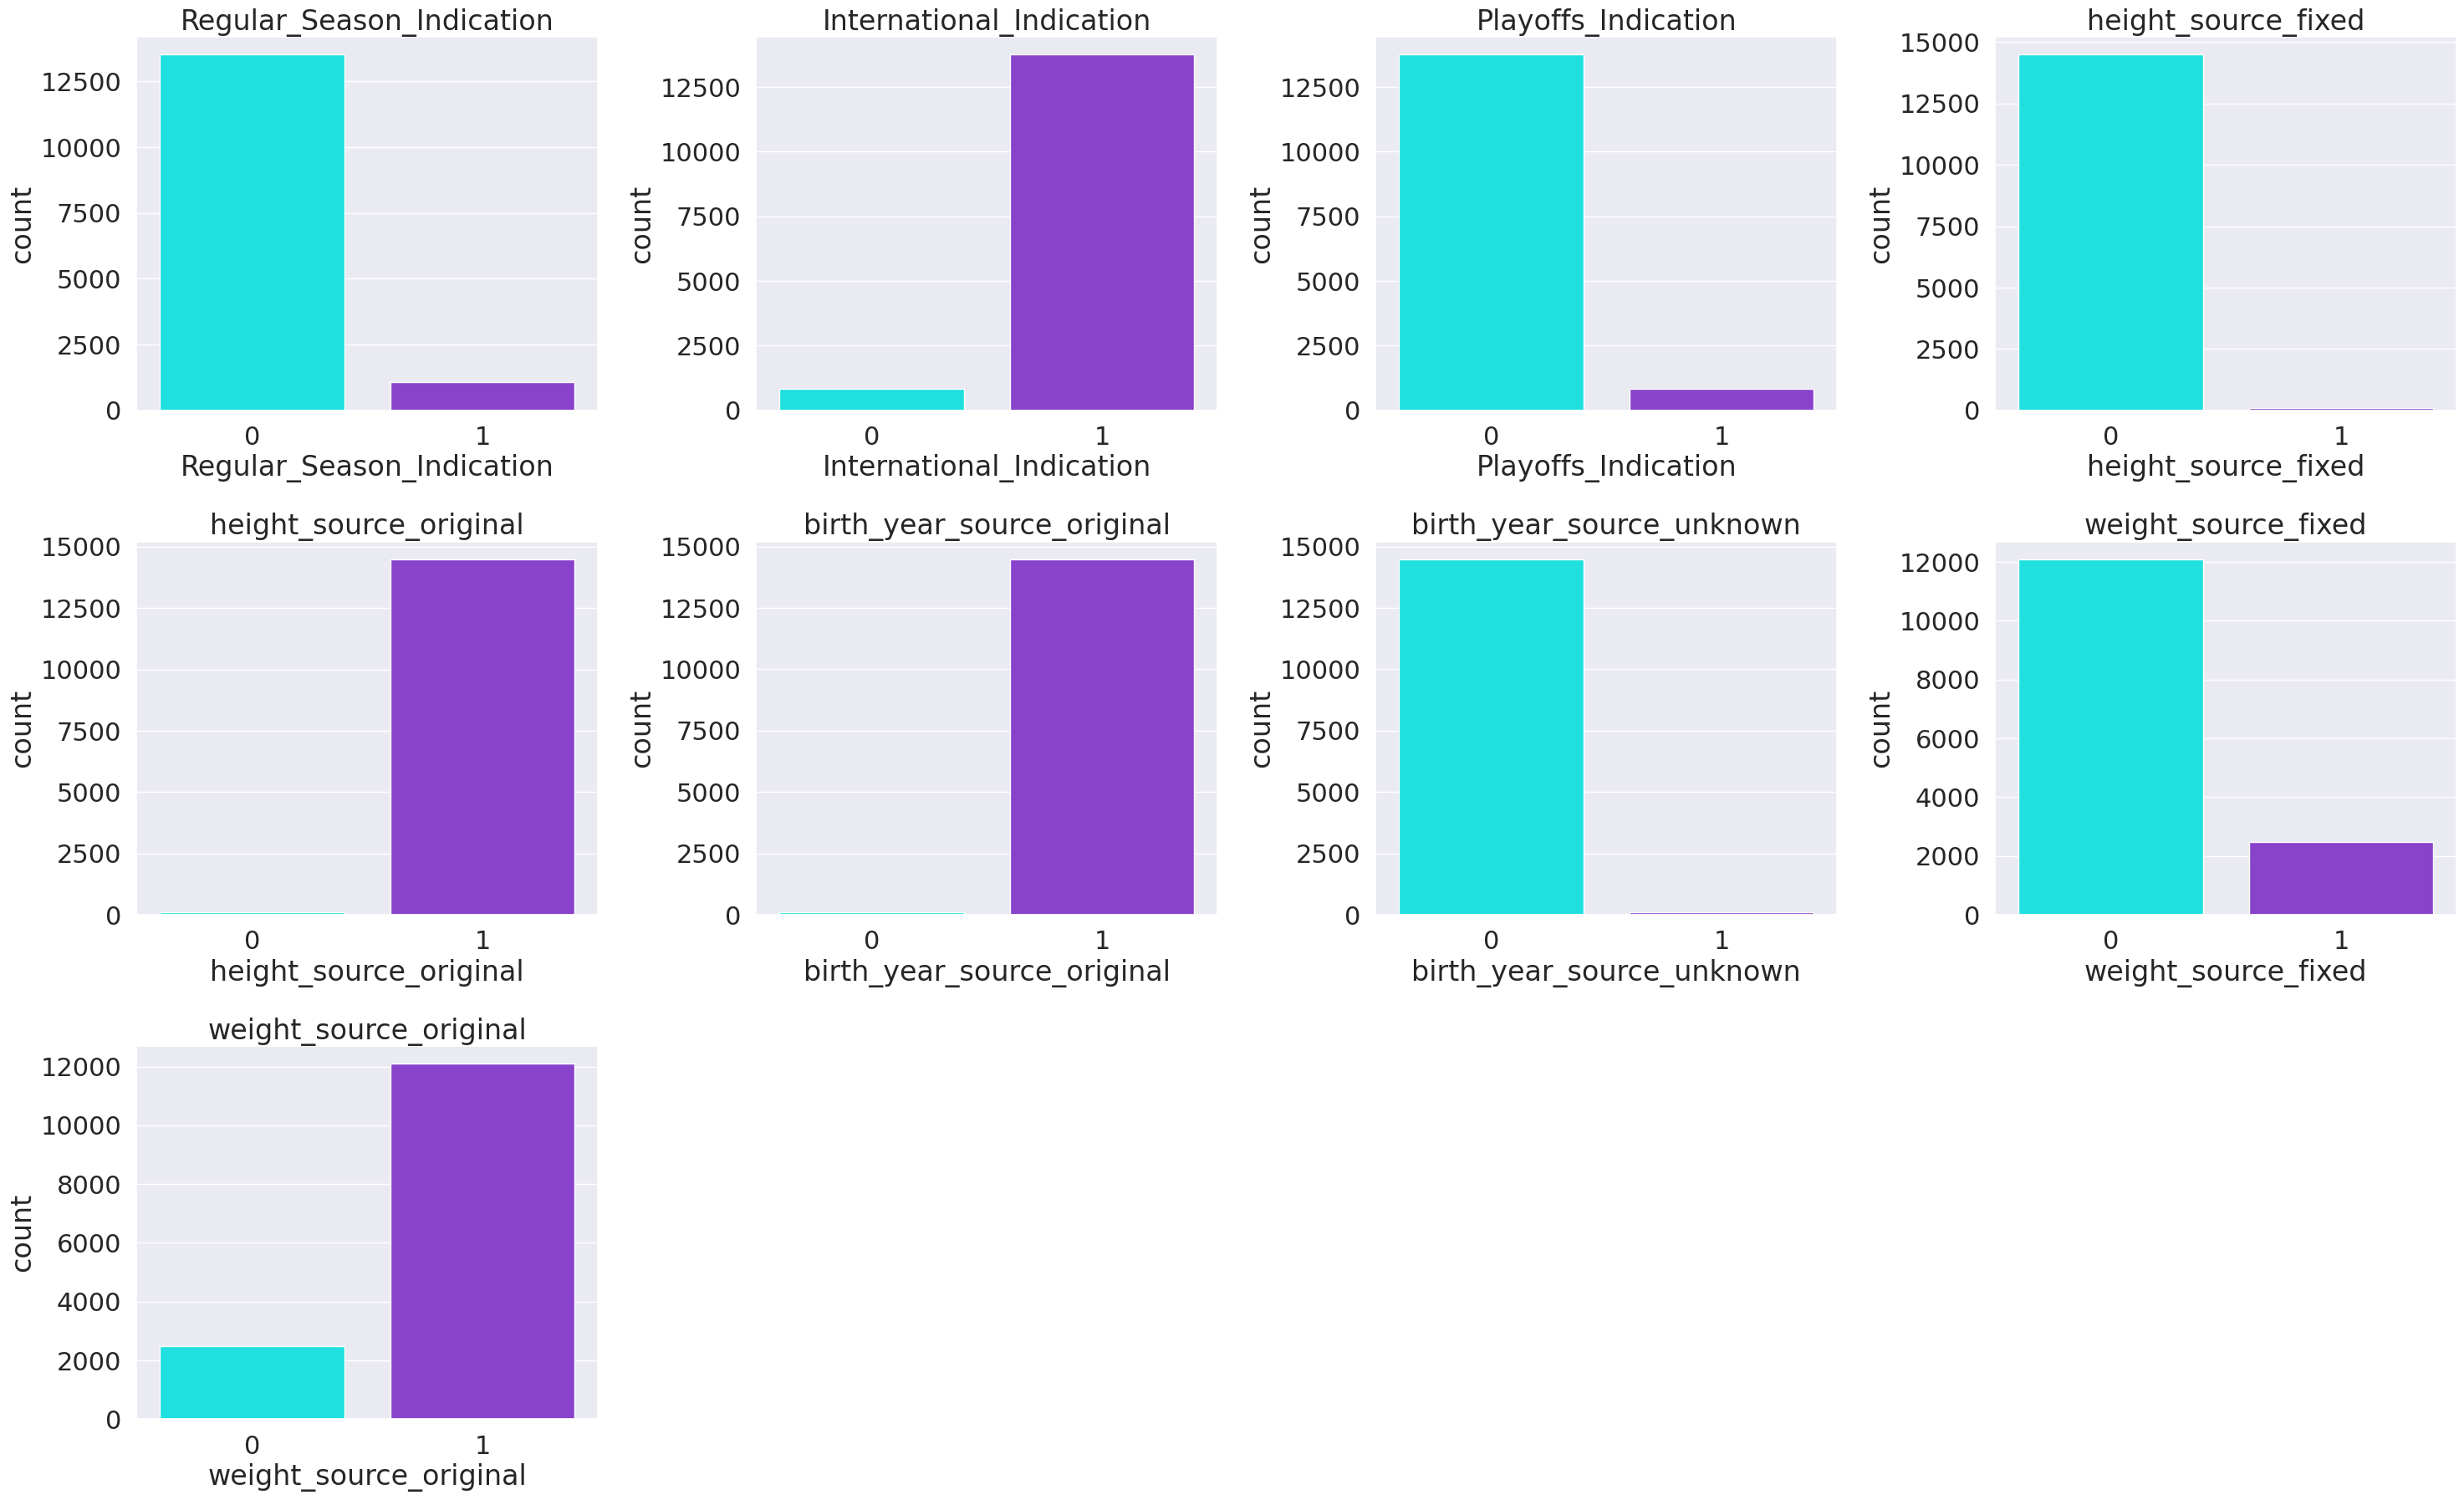

In [ ]:
a = 15  # number of rows for subplots
b = 4   # number of columns for subplots
c = 1   # plot counter

fig = plt.figure(figsize=(30, 90))
plt.subplots_adjust(hspace=0.8)
sns.set(font_scale=2)

# Iterate through the first 3 columns of df_dummy
for col in df_dummy.iloc[:, :12]:
    if col != 'NBA_Indication':  # exclude the 'NBA_Indication' column
        plt.subplot(a, b, c)
        plt.title(col)
        plt.xlabel(col)
        sns.countplot(data=df_dummy, x=col, palette=['aqua', 'blueviolet'])
        c += 1

fig.tight_layout()
plt.show()


In [ ]:
df_categorial

,Player
0,. Rufukatijiang
1,A'uston Calhoun
2,A.C. Green
3,A.D. Vassallo
4,A.J. Bramlett
...,...
14577,Zygimantas Jonusas
14578,Zygimantas Riauka
14579,Zygimantas Skucas
14580,Zygis Sestokas


In [ ]:
df_categorial.shape

(14582, 1)

Distribution of the target variable - NBA Indication


In [ ]:
df['NBA_Indication'].describe()

,NBA_Indication
count,14582.000000
mean,0.076738
std,0.266185
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


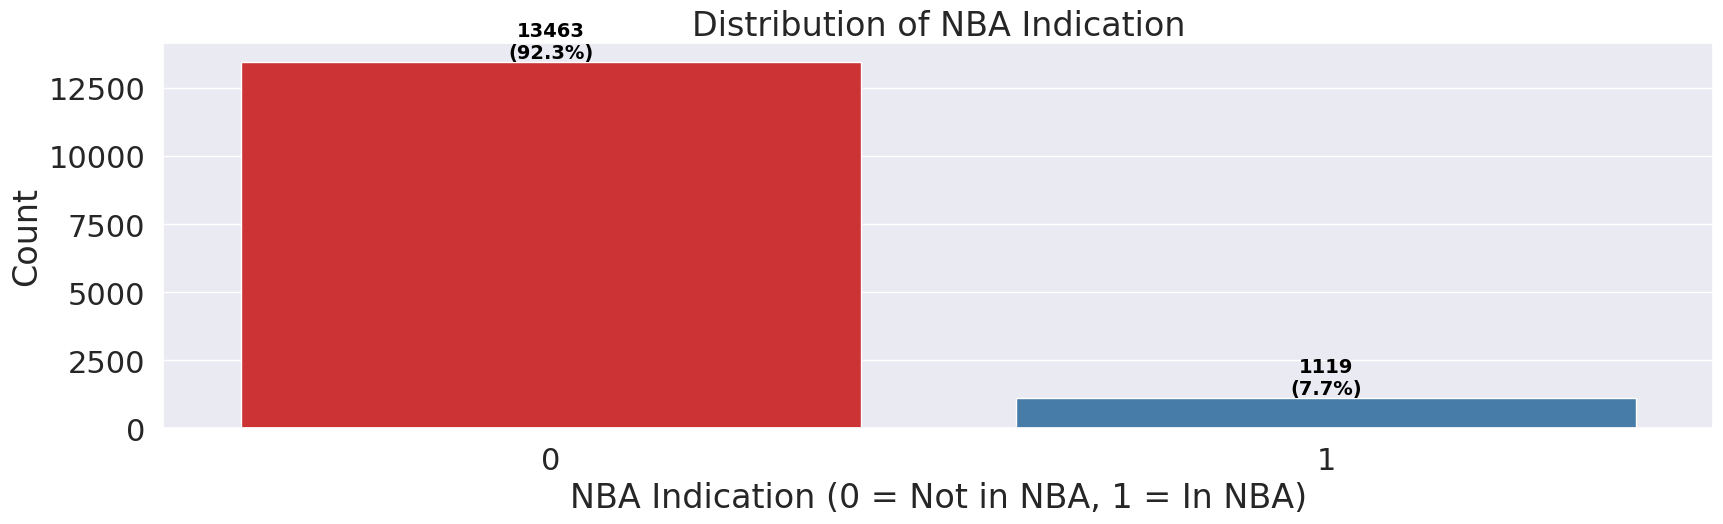

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x=df['NBA_Indication'].dropna(), data=df, palette="Set1")

# Adding Numbers and Percentages
total = len(df['NBA_Indication'].dropna())
for p in ax.patches:
    count = int(p.get_height())
    percentage = f"{100 * count / total:.1f}%"
    ax.annotate(f"{count}\n({percentage})",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=14, fontweight='bold', color='black')

plt.title("Distribution of NBA Indication")
plt.xlabel("NBA Indication (0 = Not in NBA, 1 = In NBA)")
plt.ylabel("Count")
plt.show()


Correlations

We will use spearman since the data is not normally distributed



In [ ]:
df_numeric = df.select_dtypes(include=['number'])  # Selecting only numeric columns.
corr = df_numeric.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').format(precision=4)


,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,NBA_Indication,Regular_Season_Indication,International_Indication,Playoffs_Indication,final_birth_year,final_height_cm,final_weight_kg,height_source_fixed,height_source_original,birth_year_source_original,birth_year_source_unknown,weight_source_fixed,weight_source_original
GP,1.0000,0.9780,0.9338,0.9433,0.6717,0.6979,0.8925,0.8959,0.9332,0.9744,0.8479,0.9237,0.9154,0.8817,0.9213,0.7001,0.9362,0.3314,0.3472,-0.2688,0.3178,-0.3443,0.0641,0.0844,-0.0444,0.0444,-0.0736,0.0736,-0.2723,0.2723
MIN,0.9780,1.0000,0.9735,0.9821,0.7104,0.7356,0.9366,0.9372,0.9656,0.9712,0.8626,0.9519,0.9401,0.9209,0.9540,0.7098,0.9768,0.3126,0.3279,-0.2534,0.3064,-0.3727,0.0436,0.0705,-0.0479,0.0479,-0.0755,0.0755,-0.2950,0.2950
FGM,0.9338,0.9735,1.0000,0.9934,0.6760,0.6964,0.9592,0.9597,0.9544,0.9363,0.8811,0.9580,0.9497,0.8890,0.9289,0.7466,0.9976,0.3046,0.3187,-0.2436,0.2974,-0.3535,0.1058,0.1295,-0.0509,0.0509,-0.0762,0.0762,-0.3328,0.3328
FGA,0.9433,0.9821,0.9934,1.0000,0.7255,0.7490,0.9537,0.9510,0.9621,0.9401,0.8543,0.9475,0.9344,0.9118,0.9421,0.7113,0.9954,0.3064,0.3209,-0.2461,0.2985,-0.3520,0.0486,0.0749,-0.0495,0.0495,-0.0764,0.0764,-0.3193,0.3193
3PM,0.6717,0.7104,0.6760,0.7255,1.0000,0.9933,0.6321,0.5971,0.6685,0.6368,0.4051,0.5823,0.5401,0.7525,0.7192,0.2770,0.7054,0.1404,0.1505,-0.1023,0.1394,-0.2098,-0.3053,-0.2948,-0.0304,0.0304,-0.0689,0.0689,-0.1940,0.1940
3PA,0.6979,0.7356,0.6964,0.7490,0.9933,1.0000,0.6543,0.6225,0.6970,0.6634,0.4333,0.6081,0.5669,0.7771,0.7460,0.2990,0.7247,0.1477,0.1586,-0.1083,0.1472,-0.2106,-0.3038,-0.2923,-0.0311,0.0311,-0.0696,0.0696,-0.1933,0.1933
FTM,0.8925,0.9366,0.9592,0.9537,0.6321,0.6543,1.0000,0.9943,0.9436,0.9065,0.8451,0.9229,0.9140,0.8735,0.9062,0.7047,0.9687,0.2827,0.2964,-0.2221,0.2783,-0.3707,0.0859,0.1143,-0.0544,0.0544,-0.0752,0.0752,-0.3341,0.3341
FTA,0.8959,0.9372,0.9597,0.9510,0.5971,0.6225,0.9943,1.0000,0.9467,0.9131,0.8695,0.9341,0.9291,0.8643,0.9051,0.7307,0.9654,0.2812,0.2949,-0.2199,0.2772,-0.3685,0.1173,0.1484,-0.0528,0.0528,-0.0749,0.0749,-0.3299,0.3299
TOV,0.9332,0.9656,0.9544,0.9621,0.6685,0.6970,0.9436,0.9467,1.0000,0.9419,0.8312,0.9253,0.9118,0.9301,0.9431,0.6759,0.9587,0.2794,0.2941,-0.2195,0.2782,-0.3656,0.0051,0.0491,-0.0417,0.0417,-0.0782,0.0782,-0.2868,0.2868
PF,0.9744,0.9712,0.9363,0.9401,0.6368,0.6634,0.9065,0.9131,0.9419,1.0000,0.8728,0.9362,0.9315,0.8681,0.9211,0.7329,0.9376,0.3078,0.3233,-0.2487,0.3034,-0.3776,0.1146,0.1386,-0.0488,0.0488,-0.0741,0.0741,-0.2786,0.2786


In [ ]:
df_numeric.corr(method='spearman').to_csv('correlation_matrix.csv')


In [ ]:
import os
os.listdir()

['.config', 'drive', 'correlation_matrix.csv', 'sample_data']

In [ ]:
from google.colab import files
files.download('correlation_matrix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating a correlation dataframe showing correlations and the significant levels between numerical features:

In [ ]:
cols = df_num.tolist()  # Convert Index to a list

In [ ]:
from scipy import stats
df_corr = pd.DataFrame(columns=['v1', 'v2', 'abscorr', 'origcorr', 'pval'])

cols = df_num  # Convert Index to a list

for idx, i in enumerate(cols):
    for j in cols[idx+1:]:  # Iterate only over columns after i to avoid duplicates
        a = stats.spearmanr(df[i], df[j], nan_policy='omit')
        df_corr.loc[len(df_corr)] = [i, j, abs(a[0]), a[0], a[1]]

# Filter only strong and significant correlations
df_corr_filtered = df_corr.loc[(df_corr['abscorr'] > 0.7) & (df_corr['pval'] < 0.05)]
df_corr_filtered = df_corr_filtered.sort_values(by=['abscorr'], ascending=False)

df_corr_filtered


,v1,v2,abscorr,origcorr,pval
434,weight_source_fixed,weight_source_original,1.000000,-1.000000,0.0
429,birth_year_source_original,birth_year_source_unknown,1.000000,-1.000000,0.0
420,height_source_fixed,height_source_original,1.000000,-1.000000,0.0
70,FGM,PTS,0.997587,0.997587,0.0
96,FGA,PTS,0.995402,0.995402,0.0
...,...,...,...,...,...
31,MIN,3PM,0.710359,0.710359,0.0
42,MIN,BLK,0.709809,0.709809,0.0
121,3PM,PTS,0.705369,0.705369,0.0
167,FTM,BLK,0.704719,0.704719,0.0


Pairplot of Highly Correlated Features

This visualization displays scatter plots of the six most correlated numerical features, helping to identify potential linear relationships and patterns between them.

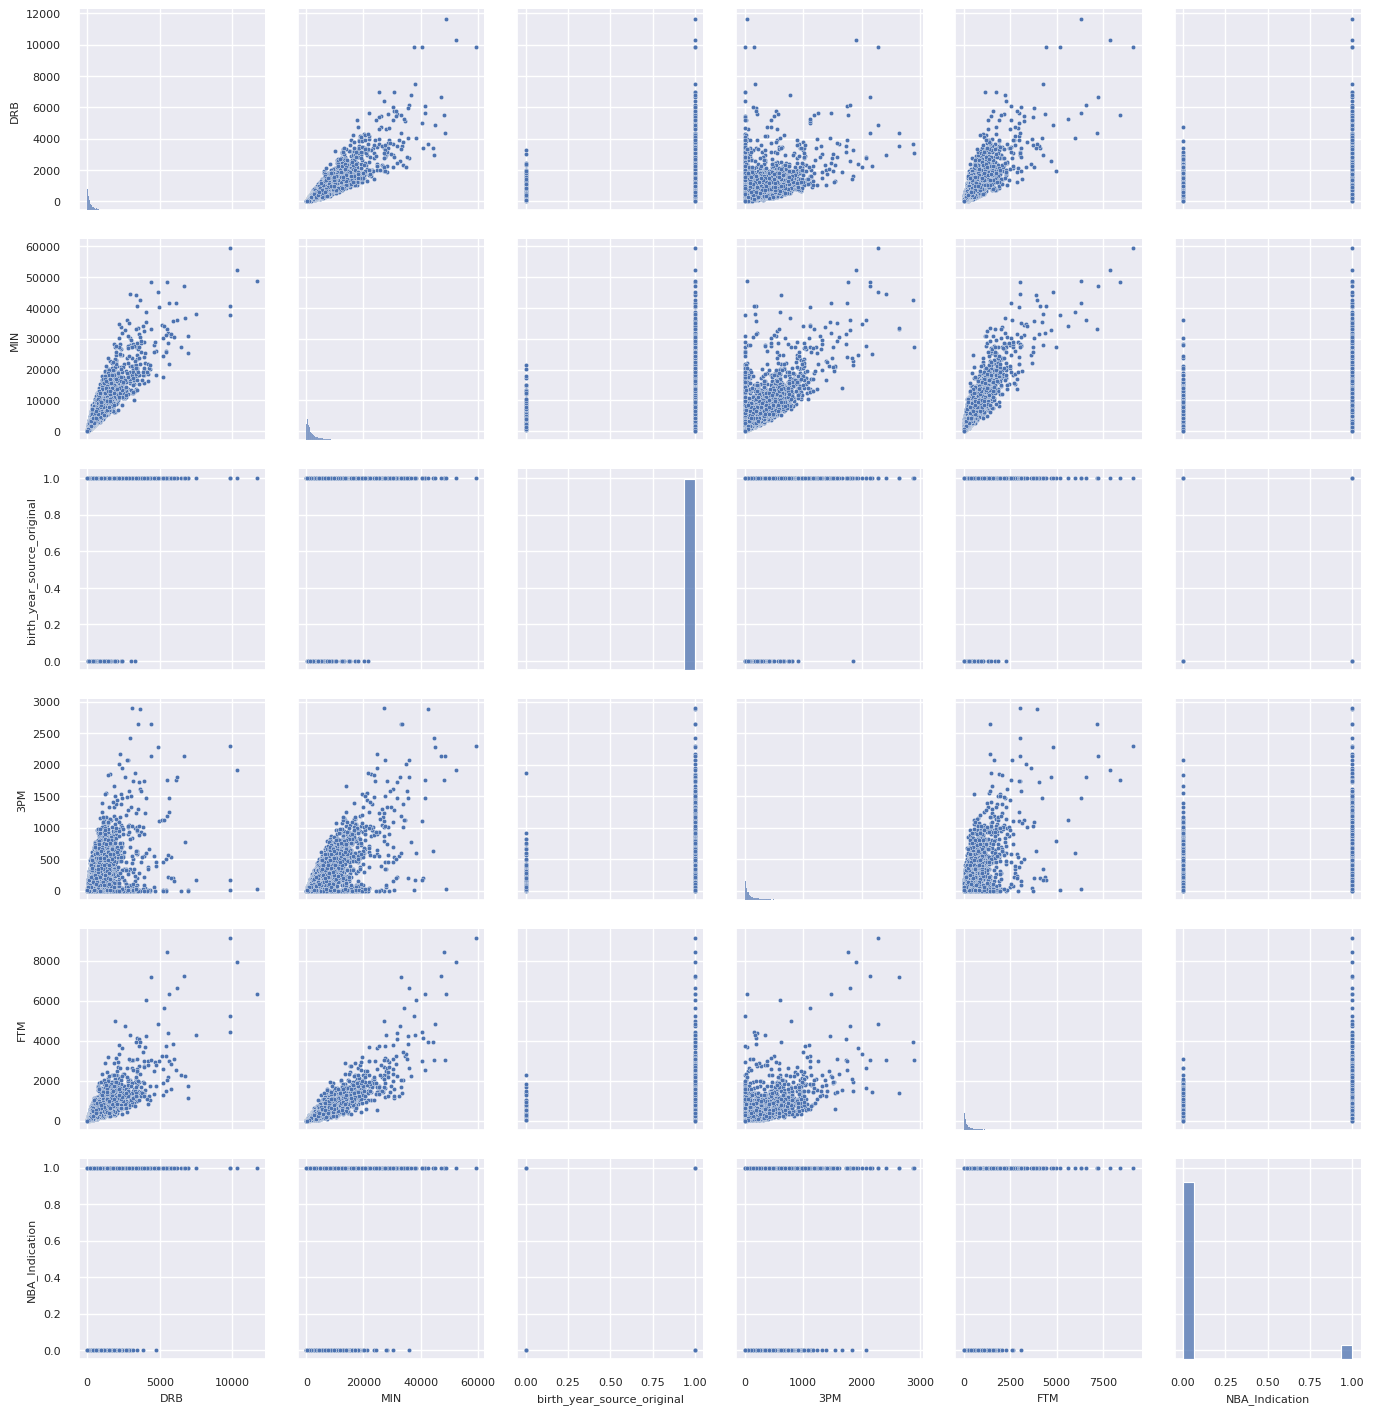

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting the most correlated variables
top_features = set(df_corr_filtered["v1"]).union(set(df_corr_filtered["v2"]))
top_features = list(top_features)[:6]  # Limiting to 6 features for better visualization

# Creating the pairplot
#sns.pairplot(df[top_features])
#plt.show()

#g=sns.pairplot(df[top_features], plot_kws={"s": 10})
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
#for ax in g.axes.flat:
    #ax.tick_params(labelsize=8)
#plt.show()


g = sns.pairplot(df[top_features], plot_kws={"s": 10})
for ax in g.axes.flat:
    ax.tick_params(labelsize=8)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
plt.show()


Chi-square test for relationships between dummy variables:



In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

chi2_results = pd.DataFrame(columns=['Variable', 'Chi2 Statistic', 'p-value'])

# Iterate through dummy variables (excluding NBA_Indication itself)
for col in df_dummy.columns:
    if col != 'NBA_Indication':  # Exclude self-comparison
        confusion_matrix = pd.crosstab(df['NBA_Indication'], df[col])  # Create contingency table
        chi2_stat, p, _, _ = chi2_contingency(confusion_matrix)  # Perform Chi-square test
        chi2_results.loc[len(chi2_results)] = [col, chi2_stat, p]

# Filter significant results (p < 0.05)
chi2_results = chi2_results[chi2_results['p-value'] < 0.05].sort_values(by='p-value')
chi2_results.head()



,Variable,Chi2 Statistic,p-value
0,Regular_Season_Indication,13934.904320,0.000000e+00
1,International_Indication,10574.848642,0.000000e+00
2,Playoffs_Indication,10696.665845,0.000000e+00
7,weight_source_fixed,235.178035,4.427442e-53
8,weight_source_original,235.178035,4.427442e-53


There appears to be a relationship between weight data and NBA participation, which could be interesting for further analysis.

ANOVA (Analysis of Variance)

In [ ]:
import scipy.stats as stats
import pandas as pd

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

anova_results = pd.DataFrame(columns=['Variable', 'F-Statistic', 'p-value'])

for col in numerical_cols:
    if col != 'NBA_Indication':  # Avoid self-comparison
        groups = [df[df['NBA_Indication'] == category][col].dropna() for category in df['NBA_Indication'].unique()]

        if len(groups) > 1:  # Ensure there is more than one group to compare
            f_stat, p_val = stats.f_oneway(*groups)
            anova_results.loc[len(anova_results)] = [col, f_stat, p_val]

# Sorting results by p-value
anova_results = anova_results.sort_values(by='p-value')

# Display significant results (p < 0.05)
anova_results[anova_results['p-value'] < 0.05]


,Variable,F-Statistic,p-value
0,GP,5119.481447,0.000000e+00
1,MIN,4745.380630,0.000000e+00
2,FGM,4214.492848,0.000000e+00
3,FGA,4418.757353,0.000000e+00
4,3PM,1667.482679,0.000000e+00
5,3PA,1726.391465,0.000000e+00
6,FTM,3123.695623,0.000000e+00
7,FTA,3127.640414,0.000000e+00
8,TOV,3334.411595,0.000000e+00
9,PF,4279.930675,0.000000e+00


ANOVA Results Summary:
It appears that the variables GP (Games Played), MIN (Minutes Played), FGM, FGA, 3PM, 3PA, FTM, FTA, TOV, PF, ORB, DRB, REB, AST, STL, BLK, PTS show significant differences between NBA players and non-NBA players.

Additionally, height, weight, and birth year differ significantly between the groups, suggesting that NBA players have distinct physical characteristics.

Moreover, the correlations with Regular_Season_Indication, Playoffs_Indication, and International_Indication indicate that a player's league history is relevant to their presence in the NBA.

Boxplots

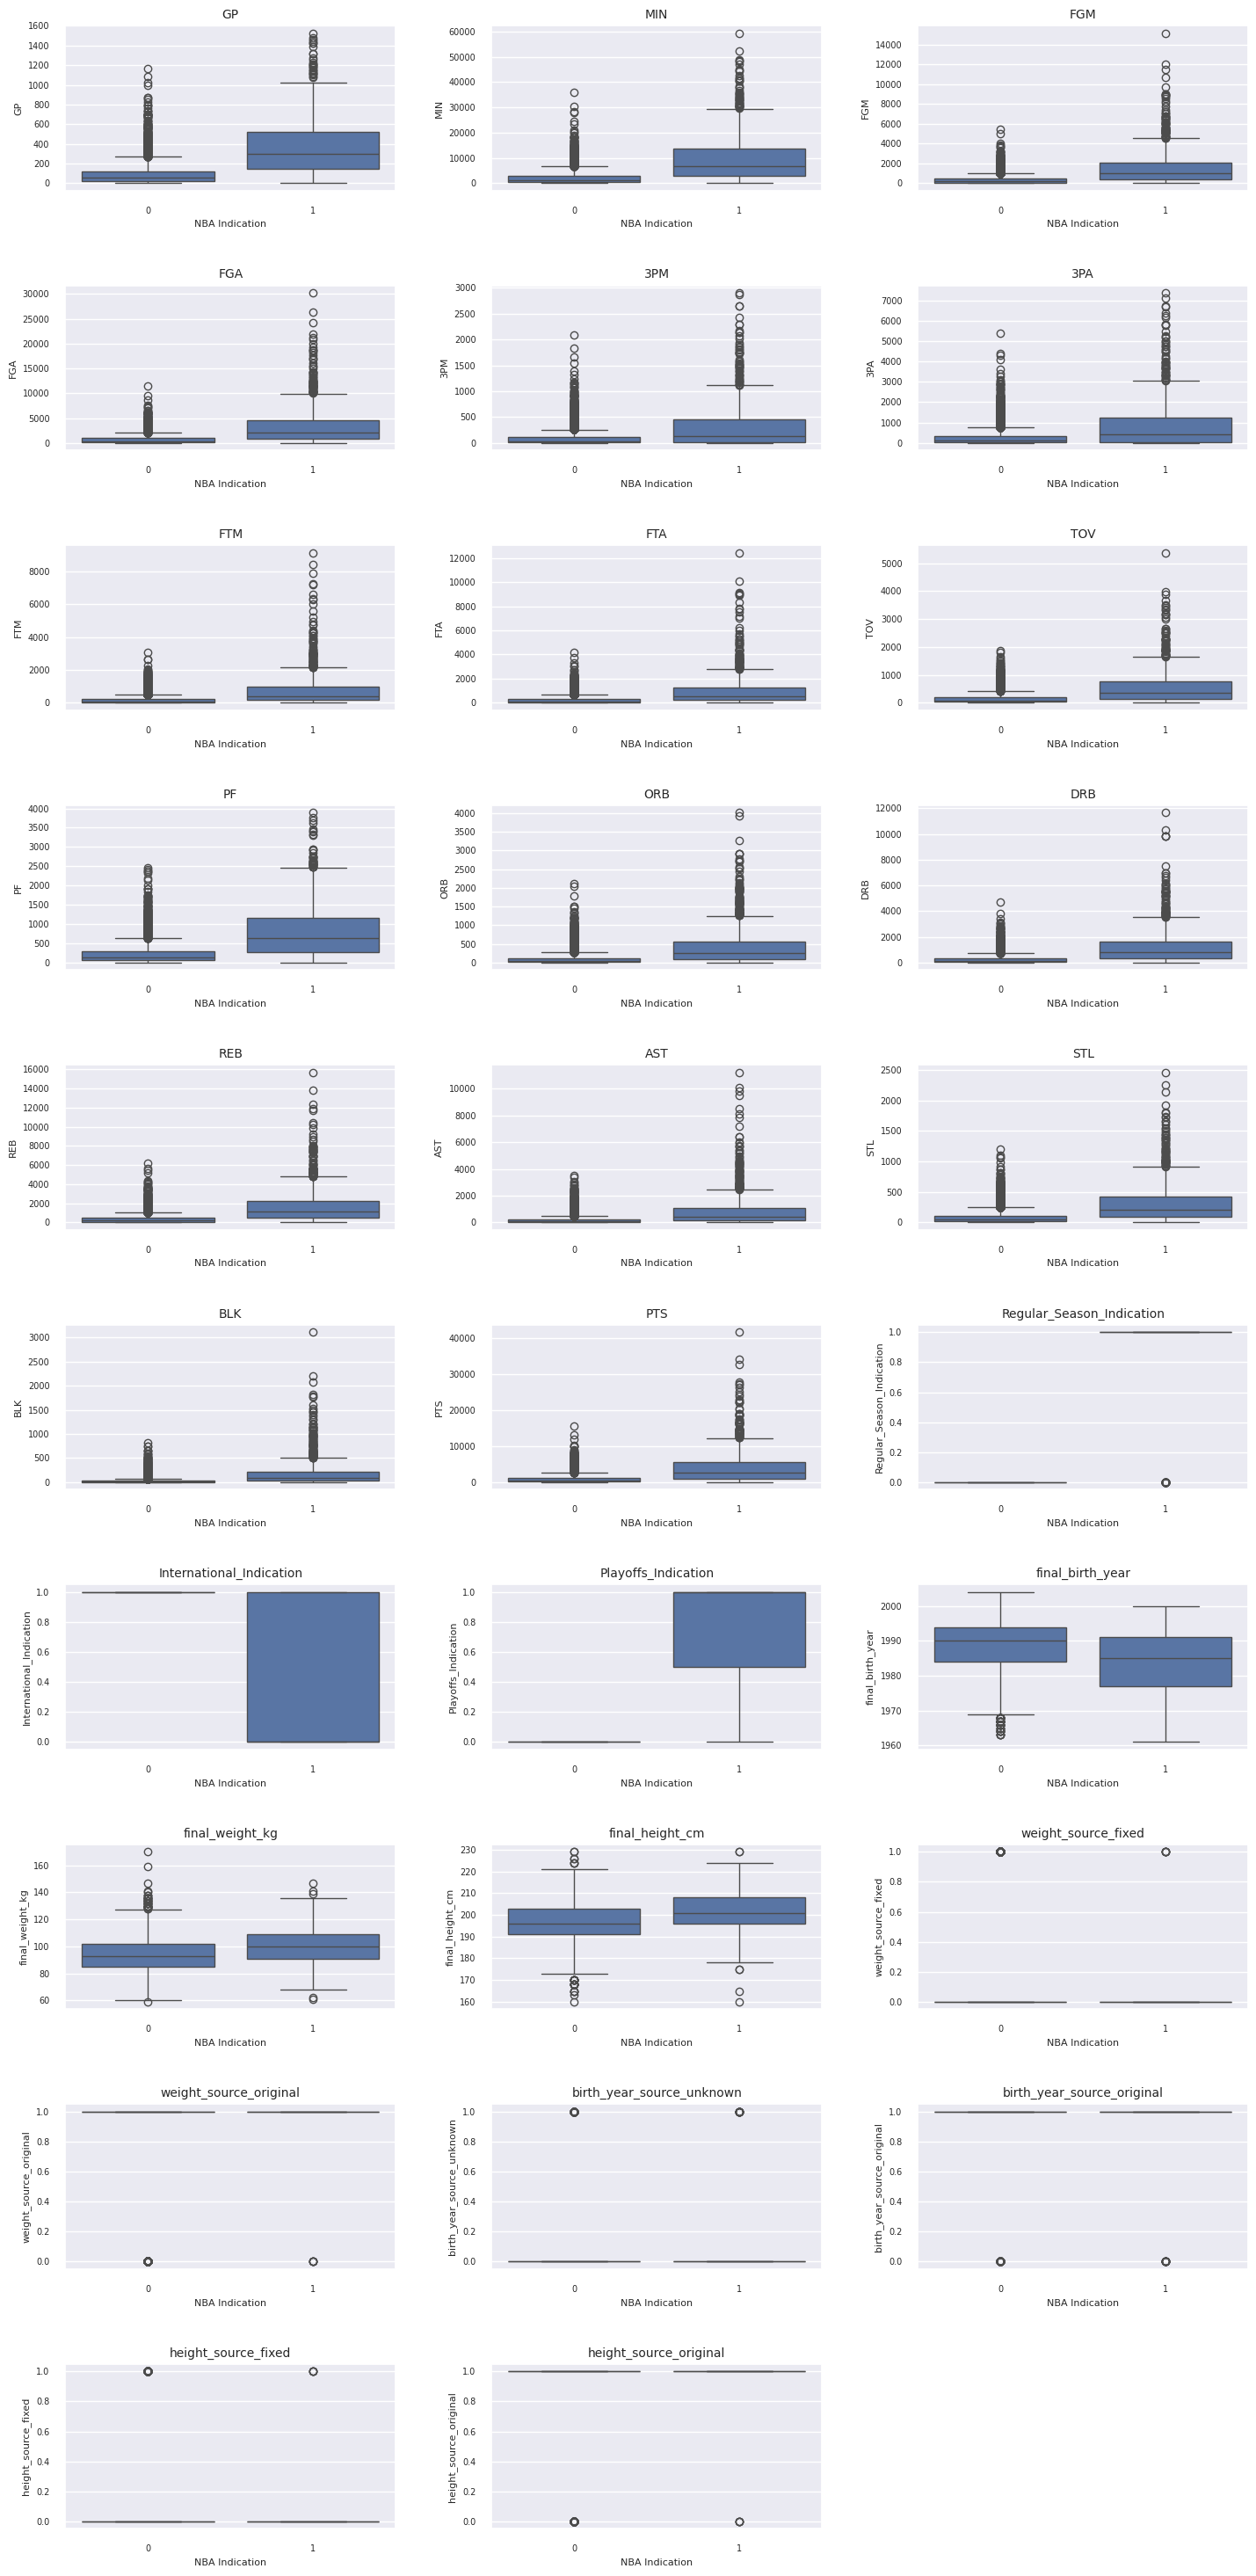

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# List of numerical features
num_features = anova_results["Variable"].tolist()

# Define grid size
num_plots = len(num_features)
cols = 3  # Number of plots per row
rows = math.ceil(num_plots / cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))  # Reduce height per row
axes = axes.flatten()  # Flatten in case of single row

# Plot each boxplot
for i, feature in enumerate(num_features):
    sns.boxplot(x=df["NBA_Indication"], y=df[feature], ax=axes[i])
    axes[i].set_title(f'{feature}', fontsize=10)  # Reduce title font size
    axes[i].set_xlabel('NBA Indication', fontsize=8)  # Reduce x-label font size
    axes[i].set_ylabel(feature, fontsize=8)  # Reduce y-label font size
    axes[i].tick_params(axis='both', which='major', labelsize=7)  # Reduce tick labels

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [ ]:
Spearman Correlations with the Target Value - NBA_Indication



In [ ]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Computing Spearman correlation with NBA_Indication
spearman_corr = numeric_df.corr(method='spearman')["NBA_Indication"].dropna().sort_values(ascending=False)

# Displaying the top correlations
print(spearman_corr)



NBA_Indication                1.000000
Regular_Season_Indication     0.978053
Playoffs_Indication           0.857030
GP                            0.331353
BLK                           0.328011
DRB                           0.315238
MIN                           0.312637
REB                           0.309556
PF                            0.307820
FGA                           0.306409
FGM                           0.304595
PTS                           0.299154
AST                           0.283866
FTM                           0.282676
FTA                           0.281190
TOV                           0.279422
STL                           0.279161
ORB                           0.278261
3PA                           0.147684
final_weight_kg               0.144175
3PM                           0.140411
final_height_cm               0.128330
weight_source_original        0.127338
birth_year_source_unknown     0.042052
height_source_original        0.010345
height_source_fixed      

In [ ]:
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load pkl file
output_pkl = '/content/drive/My Drive/Colab Notebooks/ML Project/NBA_cleaned.pkl'
df = pd.read_pickle(output_pkl)

profile=ProfileReport (df, title='ProfileReport')


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.7/395.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=832338394b5bae5a31106e358ddfcc8aaa18234edcbe006acd1edae323df1bd5
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Mounted at /content/drive


Outliers